# Proyek Analisis Data: [E-Commerce]
- **Nama:** Vicky Chandra
- **Email:** vickyc.student@gmail.com
- **ID Dicoding:** vicky-chandra
- **ID CodingCamp:** mc009d5y0364

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Pertanyaan 2 : Apa metode pembayaran yang paling sering digunakan?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengumpulkan dataset yang digunakan

#### Load DataFrame Customers

In [24]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Load DataFrame Orders

In [25]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Load DataFrame Payments

In [26]:
payments_df = pd.read_csv("https://raw.githubusercontent.com/siberandra/E-commerce-public-dataset/refs/heads/main/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Orders DataFrame:

    Memberikan informasi tentang status pesanan, waktu pemesanan, persetujuan, pengiriman, serta estimasi waktu pengiriman. Data ini dapat digunakan untuk menganalisis efisiensi proses logistik, memahami waktu pengiriman rata-rata, dan mengidentifikasi keterlambatan dalam pengiriman.

- Payments DataFrame:

    Menyediakan detail tentang metode pembayaran, jumlah cicilan, serta nilai pembayaran. Data ini membantu memahami preferensi metode pembayaran pelanggan, pola cicilan yang dipilih, dan rata-rata nilai transaksi yang dibayarkan.

- Customers DataFrame :

    Memberikan informasi terkait identitas pelanggan, lokasi geografis, dan segmentasi pelanggan. Data ini sangat berguna untuk analisis demografis, memahami perilaku pelanggan, serta meningkatkan strategi pemasaran dan retensi pelanggan.

### Assessing Data

Pada tahap ini kita akan menilai kualitas dari suluruh dataset yang akan digunakan

#### Menilai DataFrame Orders

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai DataFrame Payments

In [29]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [31]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Menilai DataFrame Customers

In [32]:
customers_df.isna().sum()
print("Jumlah data yg duplikasi:", customers_df.duplicated().sum())

Jumlah data yg duplikasi: 0


**Insight:**
- Customers DataFrame

    Tidak ada missing values dan tidak ada data duplikat.
    Data customer bersih dan siap untuk digunakan dalam analisis tanpa perlu melakukan pembersihan lebih lanjut.
    Hal ini memungkinkan analisis customer segmentation atau customer lifetime value dengan akurat.

- Payments DataFrame

    Semua kolom memiliki nilai non-null 100%, menandakan data lengkap.
    Terdapat variasi yang signifikan pada jumlah installment dan payment value, yang menunjukkan adanya pelanggan dengan pola pembayaran yang berbeda (misalnya pembayaran dengan cicilan).
    Terdapat beberapa pembayaran dengan nilai 0, yang bisa jadi indikasi refund atau error dalam transaksi.

- Orders DataFrame

    Tidak ada missing values dan data terstruktur dengan baik.
    Pola pembayaran yang didominasi oleh credit card, yang menunjukkan preferensi pelanggan dalam metode pembayaran.
    Data ini cocok untuk menganalisis tren penjualan dan metode pembayaran yang paling sering digunakan.

### Cleaning Data

In [33]:
orders_df.drop_duplicates(inplace=True)
orders_df.dropna(inplace=True)

In [34]:
payments_df.drop_duplicates(inplace=True)
payments_df.dropna(inplace=True)

In [35]:
customers_df.drop_duplicates(inplace=True)
customers_df.dropna(inplace=True)

**Insight:**
- drop_duplicates(inplace=True): Menghapus baris yang duplikat untuk memastikan data tidak redundan dan mencegah hasil analisis yang bias.

- dropna(inplace=True): Menghapus baris yang memiliki nilai kosong (missing values) untuk menjaga integritas data dan menghindari error saat analisis lebih lanjut.

Dengan melakukan kedua proses ini, data menjadi lebih bersih, akurat, dan siap untuk dianalisis secara mendalam.

## Exploratory Data Analysis (EDA)

### Mengubah kolom tanggal ke format datetime

In [36]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

### Agregasi jumlah pesanan per bulan

In [37]:
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period("M")
monthly_orders = orders_df.groupby('order_month').size()

**Insight:**
- Mengubah Format Tanggal ke Datetime

    Mengubah kolom order_purchase_timestamp ke format datetime memungkinkan analisis berbasis waktu yang lebih akurat, seperti tren penjualan dari waktu ke waktu.

- Agregasi Jumlah Pesanan per Bulan

    Dengan menambahkan kolom order_month, kita dapat melakukan agregasi jumlah pesanan berdasarkan bulan.
    Ini membantu untuk memahami pola musiman, tren penjualan, serta periode dengan volume pesanan tertinggi atau terendah.

## Visualization & Explanatory Analysis

### 1. Bagaimana tren jumlah pesanan dari waktu ke waktu?

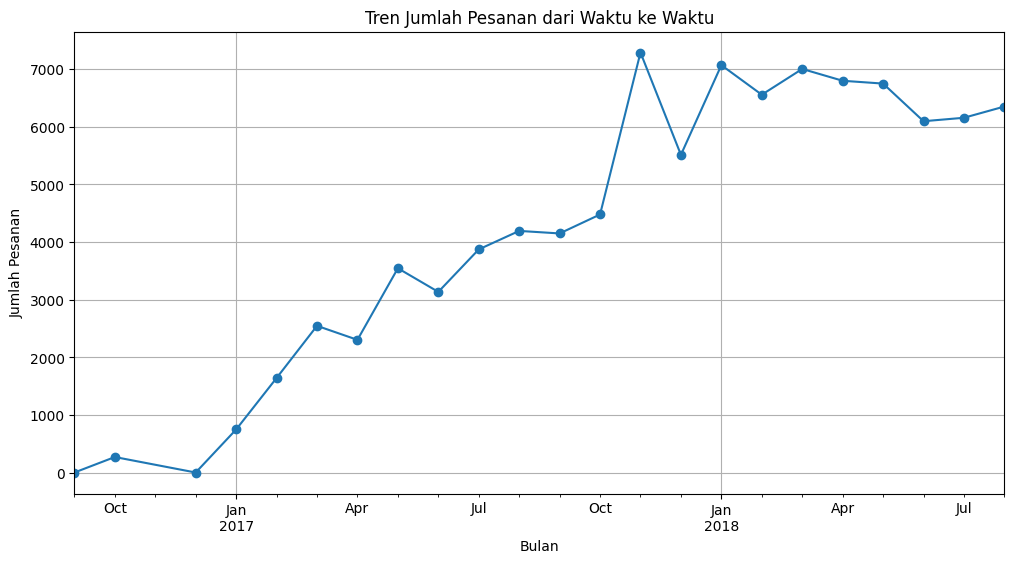

In [38]:
# Visualisasi tren jumlah pesanan
plt.figure(figsize=(12,6))
monthly_orders.plot(kind='line', marker='o')
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

**Insight:**

- Tren Positif yang Meningkat

    Dari grafik terlihat bahwa jumlah pesanan mengalami peningkatan yang signifikan dari akhir tahun 2016 hingga akhir tahun 2017. Ini menunjukkan pertumbuhan bisnis yang cukup baik pada periode tersebut.

- Puncak pada Akhir Tahun 2017

    Terdapat lonjakan pesanan yang sangat tinggi pada akhir tahun 2017, yang kemungkinan disebabkan oleh promosi akhir tahun atau event khusus seperti Black Friday atau Natal.

- Stabilitas di Tahun 2018

    Setelah lonjakan tersebut, jumlah pesanan stabil di level yang tinggi pada tahun 2018, meskipun ada sedikit fluktuasi.

- Potensi Strategi Bisnis

    Analisis ini dapat membantu dalam perencanaan strategi promosi pada periode tertentu untuk meningkatkan penjualan, serta memahami pola musiman yang bisa dimanfaatkan untuk meningkatkan keuntungan.

### 2. Apa metode pembayaran yang paling sering digunakan?

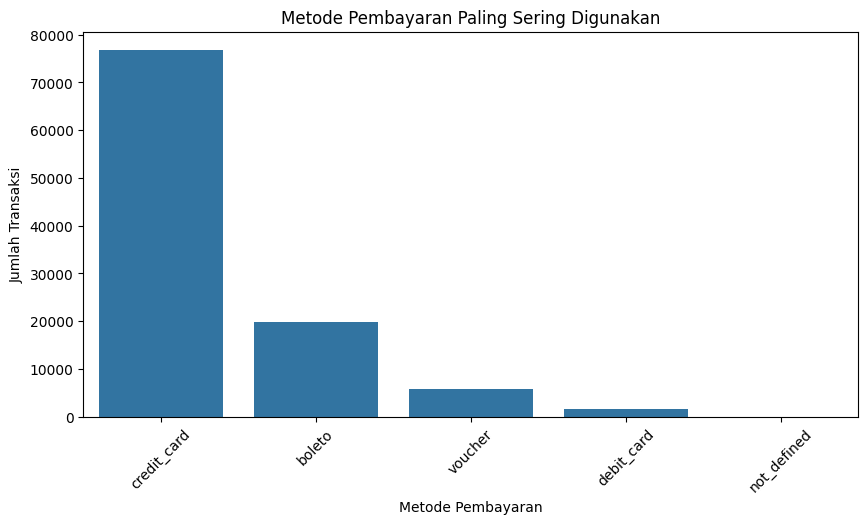

In [41]:
# Metode pembayaran paling sering digunakan
payment_counts = payments_df['payment_type'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Metode Pembayaran Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Metode Pembayaran yang Dominan

    Metode pembayaran yang paling sering digunakan adalah kartu kredit (credit card) dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. Ini menunjukkan bahwa mayoritas pelanggan lebih nyaman menggunakan kartu kredit untuk bertransaksi.

- Popularitas Metode Boleto

    Metode Boleto, yang merupakan sistem pembayaran populer di Brasil, menjadi metode pembayaran kedua yang paling banyak digunakan. Ini mengindikasikan bahwa ada segmen pasar yang masih mengandalkan pembayaran berbasis kode bar ini.

- Penggunaan Metode Lainnya yang Rendah

    Metode voucher, debit card, dan not defined memiliki jumlah transaksi yang jauh lebih rendah, yang bisa menunjukkan bahwa metode ini kurang diminati atau hanya digunakan pada situasi tertentu.

- Implikasi Bisnis

    Informasi ini dapat membantu perusahaan dalam mengoptimalkan metode pembayaran yang paling diminati untuk meningkatkan kenyamanan pelanggan, serta memberikan promo atau diskon pada metode yang kurang populer untuk mendorong penggunaannya.

## Conclusion

**Kesimpulan:**

1. Tren Jumlah Pesanan Meningkat Secara Signifikan
    - Dari hasil visualisasi tren pesanan, terlihat adanya pertumbuhan yang signifikan dari waktu ke waktu, khususnya pada pertengahan tahun 2018. Ini menunjukkan bahwa bisnis mengalami peningkatan permintaan yang stabil, namun ada sedikit penurunan di beberapa bulan terakhir yang perlu dianalisis lebih lanjut.

2. Metode Pembayaran yang Paling Sering Digunakan adalah Credit Card
    - Metode pembayaran Credit Card mendominasi transaksi dengan jumlah yang sangat tinggi, diikuti oleh Boleto. Sedangkan metode lain seperti Voucher dan Debit Card memiliki penggunaan yang jauh lebih rendah.


**Rekomendasi:**

1. Fokus pada Pengembangan Metode Pembayaran yang Dominan
    - Mengoptimalkan fitur pembayaran melalui Credit Card dan meningkatkan keamanan serta kenyamanan transaksi untuk menjaga loyalitas pelanggan.

2. Mendorong Penggunaan Metode Pembayaran Lainnya
    - Memberikan promo atau diskon khusus bagi pengguna metode Boleto, Voucher, dan Debit Card untuk meningkatkan penggunaan metode pembayaran yang kurang populer.

3. Analisis Lebih Lanjut Terhadap Penurunan di Akhir Waktu
    - Melakukan analisis mendalam terkait faktor-faktor yang menyebabkan penurunan pesanan di beberapa bulan terakhir. Bisa jadi terkait dengan musim, harga, atau faktor eksternal lainnya.

4. Meningkatkan Customer Experience
    - Memberikan pelayanan yang lebih baik, mempercepat proses pembayaran, serta menawarkan opsi pembayaran yang lebih fleksibel untuk meningkatkan kepuasan pelanggan.

5. Monitoring Secara Berkala
    - Melakukan analisis data secara berkala untuk mengidentifikasi pola tren yang berubah dan melakukan strategi yang lebih adaptif.



In [43]:
all_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
all_df = pd.merge(all_df, payments_df, on='order_id', how='left')

all_df.to_csv("all_data.csv", index=False)